In [108]:
%pylab inline
#Import matplotlib & numpy namespace

Populating the interactive namespace from numpy and matplotlib


In [117]:
#Voici comment les données ont été traitées : et placées dans un unique fichier pour chaque stratégie

"""
#IMPORTATION DES DONNEES , FUSION DES DONNES ET TRAITEMENT POUR LES STATS DESCRIPTIVES




#1- DONNEES ISSUES DE PARTIES JOUANT LA STRATEGIE DE BASE

import csv,numpy as np

NAME_MAT1='ALL_FILES/BETDD1_T.csv'
r = csv.reader(open(NAME_MAT1)) # Here your csv file
lines = list(r)
MAT1=np.array(lines)
MAT1=MAT1.transpose()

#LES DONNEES COLLECTEES SUR LA STRATEGIE DE BASE
NAMES_OTHER_DATA=['ALL_FILES/BETDD'+str(i)+'_T.csv' for i in range(2,14)]

#POUR CHAQUE FICHIER DE DONNEES , RETIRE LA 1ere LIGNE (QUI DONNE LE NOM DES VARIABLES), AJOUTE LE FICHIER AUX AUTRES
for namefile in NAMES_OTHER_DATA:
    
    r_new=csv.reader(open(namefile))
    lines_new=list(r_new)
    MAT_new=np.array(lines_new)
    MAT_new=MAT_new.transpose()
    new_lines=list(MAT_new)
    new_lines.pop(0)
    new_MAT=np.array(new_lines)
    print(new_MAT.shape)
    MAT1=np.concatenate((MAT1,new_MAT),axis=0)

#RETOURNE CE FICHIER CSV TRAITEE 
writer = csv.writer(open('ALL_FILES/DATA_BET_STRAT_BASIC.csv','w'))
writer.writerows(MAT1)





#2- DONNEES ISSUES DE PARTIES JOUANT LA STRAT ML SANS STRAT DE MISES (STRATEGIE DIRECTEMENT ISSUE DU RANDOM FOREST)

NAME_MAT1ML='ALL_FILES/DATA_ML_SANS_MISE1.csv'
r_ML=csv.reader(open(NAME_MAT1ML))
lines_ML=list(r_ML)
MAT1_ML=np.array(lines_ML)
MAT1_ML=MAT1_ML.transpose()
print(MAT1_ML.shape)

#LES DONNEES COLLECTEES SUR LA STRATEGIE ML (SANS STRAT DE MISES)
NAMES_OTHER_ML=['ALL_FILES/DATA_ML_SANS_MISE'+str(i)+'.csv' for i in range(2,6)]


#POUR CHAQUE FICHIER DE DONNEES , RETIRE LA 1ere LIGNE (QUI DONNE LE NOM DES VARIABLES), AJOUTE LE FICHIER AUX AUTRES
for namefile in NAMES_OTHER_ML:
    rnew_ML=csv.reader(open(namefile))
    lines_new_ML=list(rnew_ML)
    MAT_new_ML=np.array(lines_new_ML)
    MAT_new_ML=MAT_new_ML.transpose()
    newlines_ML=list(MAT_new_ML)
    newlines_ML.pop(0)
    new_MAT_ML=np.array(newlines_ML)
    print(new_MAT_ML.shape)
    MAT1_ML=np.concatenate((MAT1_ML,new_MAT_ML),axis=0)

#RETOURNE CE FICHIER CSV TRAITEE 
writer = csv.writer(open('ALL_FILES/DATA_STRAT_SANS_MISE_ML.csv','w'))
writer.writerows(MAT1_ML)






#3- DONNEES ISSUES DE PARTIES JOUANT LA STRAT ML AVEC STRAT MISES (STRATEGIE RANDOM FOREST AVEC SYSTEME DE MISES)

NAME_MAT1ML='ALL_FILES/BETDD_ML1.csv'
r_ML=csv.reader(open(NAME_MAT1ML))
lines_ML=list(r_ML)
MAT1_ML=np.array(lines_ML)
MAT1_ML=MAT1_ML.transpose()

#LES DONNEES COLLECTEES SUR LA STRATEGIE ML
NAMES_OTHER_ML=['ALL_FILES/BETDD_ML'+str(i)+'.csv' for i in range(2,7)]

#POUR CHAQUE FICHIER DE DONNEES , RETIRE LA 1ere LIGNE (QUI DONNE LE NOM DES VARIABLES), AJOUTE LE FICHIER AUX AUTRES
for namefile in NAMES_OTHER_ML:
    rnew_ML=csv.reader(open(namefile))
    lines_new_ML=list(rnew_ML)
    MAT_new_ML=np.array(lines_new_ML)
    MAT_new_ML=MAT_new_ML.transpose()
    newlines_ML=list(MAT_new_ML)
    newlines_ML.pop(0)
    new_MAT_ML=np.array(newlines_ML)
    MAT1_ML=np.concatenate((MAT1_ML,new_MAT_ML),axis=0)

#RETOURNE CE FICHIER CSV TRAITEE 
writer = csv.writer(open('ALL_FILES/DATA_BET_STRAT_ML.csv','w'))
writer.writerows(MAT1_ML) 
"""



(3836, 3)
(6568, 3)
(4954, 3)
(4890, 3)
(5758, 3)
(5436, 3)
(3022, 3)
(2778, 3)
(6627, 3)
(3717, 3)
(8667, 3)
(5313, 3)
(2236, 3)
(5469, 3)
(6222, 3)
(3702, 3)
(4899, 3)


In [118]:
import pandas as pd
# Read in data and display first 5 rows

#Données STRAT de BASE
features = pd.read_csv('ALL_FILES/DATA_BET_STRAT_BASIC.csv')

#Données STRAT ML AVEC STRAT DE MISES
features_ML=pd.read_csv('ALL_FILES/DATA_BET_STRAT_ML.csv')

#Données STRAT ML SANS STRAT DE MISES
features_ML_NO_BETS=pd.read_csv('ALL_FILES/DATA_STRAT_SANS_MISE_ML.csv')



In [119]:
#STRATEGIE DE BASE
features.describe(percentiles=[.1, .25 , .5 , .75 , .9])

#STATS IMPORTANTES: 

#TAILLE DE L'ECHANTILLON=65200 PARTIES
#MOYENNE DE GAIN=1.508
#MOYENNE DE MISES =45.09
#Truecount est compris entre -4 et 4 dans 90% des données

,TRUECOUNT,BET_AMOUNT,GAIN
count,63526.000000,63526.000000,63526.000000
mean,-0.062903,45.097755,1.508752
std,9.482450,35.630487,68.715169
min,-200.000000,5.000000,-400.000000
10%,-4.000000,5.000000,-100.000000
25%,-1.000000,5.000000,-25.000000
50%,0.000000,25.000000,0.000000
75%,1.000000,100.000000,25.000000
90%,4.000000,100.000000,100.000000
max,200.000000,100.000000,400.000000


In [120]:
#STRATEGIE ML SANS MISES 
features_ML_NO_BETS.describe(percentiles=[.1, .25 , .5 , .75 , .9])

#STATS IMPORTANTES: 

#TAILLE DE L'ECHANTILLON=5469 PARTIES
#MOYENNE DE GAIN=0.434266  (a rapporter sur MOYENNE DE MISES)
#MOYENNE DE MISES =25 (mises constantes)
#Truecount est compris entre -4 et 4 dans 90% des données

,TRUECOUNT,BET_AMOUNT,GAIN
count,22527.000000,22527.0,22527.000000
mean,-0.026768,25.0,0.777955
std,9.470715,0.0,29.960087
min,-200.000000,25.0,-100.000000
10%,-4.000000,25.0,-25.000000
25%,-1.000000,25.0,-25.000000
50%,0.000000,25.0,0.000000
75%,1.000000,25.0,25.000000
90%,4.000000,25.0,50.000000
max,200.000000,25.0,100.000000


In [121]:
#STRATEGIE ML AVEC MISES 
features_ML.describe(percentiles=[.1, .25 , .5 , .75 , .9])

#STATS IMPORTANTES: 

#TAILLE DE L'ECHANTILLON=16862 PARTIES
#MOYENNE DE GAIN=0.831  (a rapporter sur MOYENNE DE MISES)
#MOYENNE DE MISES =19.92
#Truecount est compris entre -4 et 4 dans 90% des données

,TRUECOUNT,BET_AMOUNT,GAIN
count,31814.000000,31814.000000,31814.000000
mean,-0.193437,19.781543,1.210316
std,9.204422,29.174689,41.455470
min,-200.000000,5.000000,-300.000000
10%,-4.000000,5.000000,-25.000000
25%,-1.000000,5.000000,-5.000000
50%,0.000000,5.000000,0.000000
75%,1.000000,25.000000,5.000000
90%,4.000000,100.000000,25.000000
max,200.000000,100.000000,400.000000


In [122]:
#Realisation des plots de convergence de l'espérance des gains "réels" (= gains par unité de mise de 10$) 
#pour comparer les performances des deux stratégies.

%pylab inline
import csv,numpy as np

DONNEES_STRAT_DE_BASE = csv.reader(open('ALL_FILES/DATA_BET_STRAT_BASIC.csv')) # Here your csv file
DONNEES_STRAT_ML=csv.reader(open('ALL_FILES/DATA_BET_STRAT_ML.csv'))
DONNEES_STRAT_ML_NOBETS=csv.reader(open('ALL_FILES/DATA_STRAT_SANS_MISE_ML.csv'))

lines = list(DONNEES_STRAT_DE_BASE)
lines_ML=list(DONNEES_STRAT_ML)
lines_ML_NOBETS=list(DONNEES_STRAT_ML_NOBETS)

#TAILLE DES JEUX DE DONNEES ISSUS DES TROIS STRATEGIES
taille_SAMPLE=len(lines)
taille_SAMPLE_ML=len(lines_ML)
taille_SAMPLE_ML_NOBETS=len(lines_ML_NOBETS)



# RECUPERATION DES GAIN DES DEUX STRATEGIES 
gain=[lines[i][2] for i in range(1,taille_SAMPLE)]
gain_ML=[lines_ML[i][2] for i in range(1,taille_SAMPLE_ML)]
gain_ML_NOBETS=[lines_ML_NOBETS[i][2] for i in range(1,taille_SAMPLE_ML_NOBETS)]

# RECUPERATION DES MOYENNES DE MISES DES DEUX STRATEGIES
mean_BET=sum([int(lines[i][1]) for i in range(1,taille_SAMPLE)])/taille_SAMPLE
mean_BET_ML=sum([int(lines_ML[i][1]) for i in range(1,taille_SAMPLE_ML)])/taille_SAMPLE_ML
mean_BET_ML_NO_STRAT_BETS=25
print("MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT DE BASE: ",mean_BET)
print("MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT ML AVEC  STRAT DE MISES: ",mean_BET_ML)
print("MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT ML SANS STRAT DE MISES: ",mean_BET_ML_NO_STRAT_BETS)

# GAIN DIVISES PAR LA MOYENNE DE MISES ET MULTIPLIES PAR 10 POUR COMPARER LES PERFORMANCES DES STRATEGIES POUR UNE UNITE 
# DE MISE DE 10 DOLLAR
gain_relatif=[10*int(i)/mean_BET for i in gain]
gain_relatif_ML=[10*int(i)/mean_BET_ML for i in gain_ML]
gain_relatif_ML_NOBETS=[10*int(i)/25 for i in gain_ML_NOBETS]


#MOYENNES EMPIRIQUES DES GAINS DES DEUX STRATEGIES
GAIN_MOY=[sum(gain_relatif[1:n])/n for n in range(1,taille_SAMPLE)]
GAIN_MOY_ML=[sum(gain_relatif_ML[1:n])/n  for n in range(1,taille_SAMPLE_ML)]
GAIN_MOY_ML_NOBETS=[sum(gain_relatif_ML_NOBETS[1:n])/n  for n in range(1,taille_SAMPLE_ML_NOBETS)]









Populating the interactive namespace from numpy and matplotlib
MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT DE BASE:  45.0970453508
MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT ML AVEC  STRAT DE MISES:  19.7809209492
MISE MOYENNE DES PARTIES COLLECTEES ISSUS DE LA STRAT ML SANS STRAT DE MISES:  25


In [123]:
# LIMITES DES ESPERANCES DE GAIN POUR UNE MOYENNE DE MISE DE 10 DOLLAR : 
#LA STRATEGIE ML , couplée à la strategie de mises est plus performante que la STRAT DE BASE

print("LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT DE BASE: ",GAIN_MOY[-1])
print("LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT ML SANS STRAT DE MISES: ",GAIN_MOY_ML_NOBETS[-1])
print("LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT ML AVEC STRAT DE MISES: ",GAIN_MOY_ML[-1])


LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT DE BASE:  0.334574253829
LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT ML SANS STRAT DE MISES:  0.311626048742
LIMITE DE l'ESPERANCE DE GAIN DE LA STRAT ML AVEC STRAT DE MISES:  0.611701492093


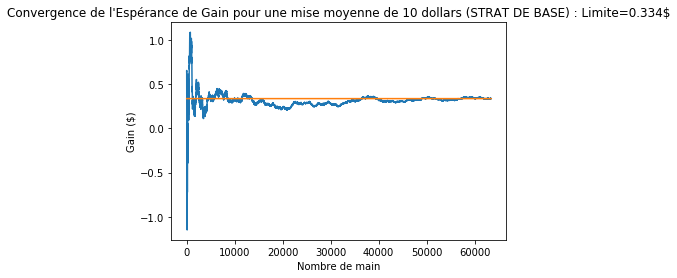

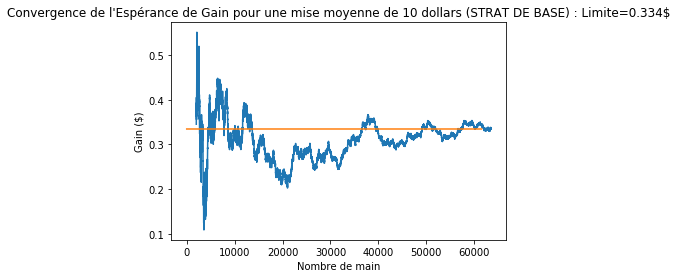

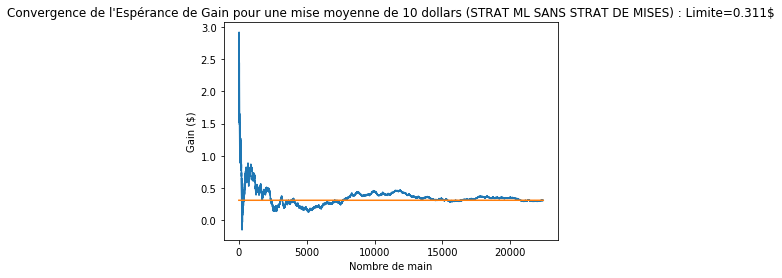

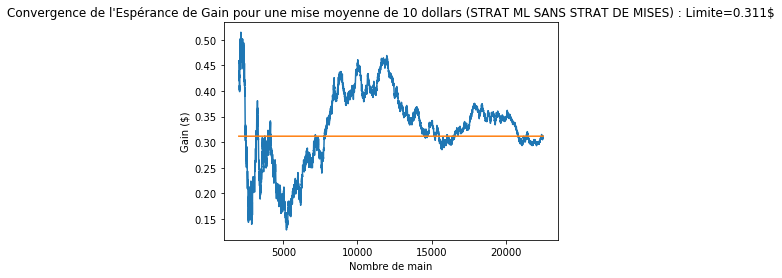

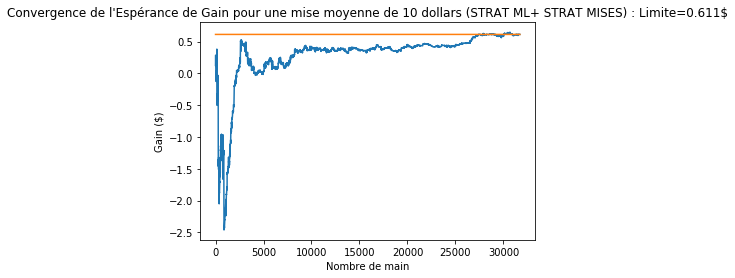

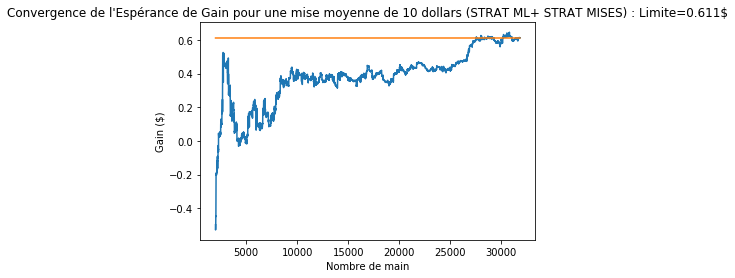

In [124]:
lim=GAIN_MOY[-1]
lim_ML=GAIN_MOY_ML[-1]
lim_ML_NOBETS=GAIN_MOY_ML_NOBETS[-1]

#PREMIER PLOT (ESPERANCE DE GAIN DE LA STRATEGIE DE BASE POUR UNE MISE DE 10$)
plot(GAIN_MOY[100:])
plot([lim for i in range(taille_SAMPLE -100)])
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT DE BASE) : Limite="+str(int(1000*(lim))/1000)+"$")
show()

#SECOND PLOT (ESPERANCE DE GAIN DE LA STRATEGIE DE BASE POUR UNE MISE DE 10$ ) , A PARTIR DE 2000 PARTIES
plot(np.arange(2000,taille_SAMPLE-1),GAIN_MOY[2000:])

plot([lim for i in range(taille_SAMPLE -2000)])
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT DE BASE) : Limite="+str(int(1000*(lim))/1000)+"$")
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
show()

#TROISIEME PLOT (ESPERANCE DE GAIN DE LA STRATEGIE ML SANS STRAT DE MISES POUR UNE MISE DE 10$)
plot(GAIN_MOY_ML_NOBETS[100:])
plot([lim_ML_NOBETS for i in range(taille_SAMPLE_ML_NOBETS -100)])
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT ML SANS STRAT DE MISES) : Limite="+str(int(1000*(lim_ML_NOBETS))/1000)+"$")
show()

#QUATRIEME PLOT (ESPERANCE DE GAIN DE LA STRATEGIE ML SANS STRAT DE MISES, POUR UNE MISE DE 10$) , A PARTIR DE 2000 PARTIES
plot(np.arange(2000,taille_SAMPLE_ML_NOBETS-1),GAIN_MOY_ML_NOBETS[2000:])
plot(np.arange(2000,taille_SAMPLE_ML_NOBETS),[lim_ML_NOBETS for i in range(taille_SAMPLE_ML_NOBETS-2000)])
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT ML SANS STRAT DE MISES) : Limite="+str(int(1000*(lim_ML_NOBETS))/1000)+"$")
show()


#CINQUIEME PLOT (ESPERANCE DE GAIN DE LA STRATEGIE ML POUR UNE MISE DE 10$)
plot(GAIN_MOY_ML[100:])
plot([lim_ML for i in range(taille_SAMPLE_ML -100)])
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT ML+ STRAT MISES) : Limite="+str(int(1000*(lim_ML))/1000)+"$")
show()

#SIXIEME PLOT (ESPERANCE DE GAIN DE LA STRATEGIE ML POUR UNE MISE DE 10$) , A PARTIR DE 2000 PARTIES
plot(np.arange(2000,taille_SAMPLE_ML-1),GAIN_MOY_ML[2000:])
plot(np.arange(2000,taille_SAMPLE_ML),[lim_ML for i in range(taille_SAMPLE_ML-2000)])
plt.xlabel('Nombre de main')
plt.ylabel('Gain ($)')
plt.title("Convergence de l'Espérance de Gain pour une mise moyenne de 10 dollars (STRAT ML+ STRAT MISES) : Limite="+str(int(1000*(lim_ML))/1000)+"$")
show()

In [125]:
# HISTOGRAMME : EVOLUTION DU GAIN MOYEN DE LA STRATEGIE DE BASE POUR UNE UNITE DE MISE DE 10 DOLLAR EN FONCTION DU
# TRUECOUNT

gain_per_count=[] #GAINS PAR TRUECOUNT
len_data_per_count=[] #NOMBRE DE PARTIES AYANT DEBUTEES AVEC UN CERTAINS TRUECOUNT

#GAINS RELATIFS PAR TRUECOUNT POUR UNE MISE DE 10 DOLLAR:
#CALCUL: (MOYENNE DES GAINS POUR CHAQUE TRUECOUNT / MOYENNE DE MISES) * 10 

for i in range(-5,6):
    if i==5 or i==-5:
        
        #TRUECOUNT<=-5 (- de 5% de données)
        if i==-5:
            gain_for_TC=[int(lines[j][2]) for j in range(1,taille_SAMPLE) if int(lines[j][0])<=-5]
            
        #TRUECOUNT>=5 (- de 5% de données)
        if i==5:
            gain_for_TC=[int(lines[j][2]) for j in range(1,taille_SAMPLE) if int(lines[j][0])>=5]
            
    else:#TRUECOUNT ENTRE -4 ET 4 (90% des données)
        
        gain_for_TC=[int(lines[j][2]) for j in range(1,taille_SAMPLE) if lines[j][0]==str(i)]
        
    
    len_data_per_count.append(len(gain_for_TC))
    gain_per_count.append(mean(gain_for_TC))

Truecount_sample=zip(len_data_per_count,["<= - 5"]+['='+str(i) for i in range(-4,5)]+[">= 5"])
print(gain_per_count)


[-2.5558121632024635, -1.9811842833425568, -0.4418262150220913, -1.7858880778588808, 1.3007474717866041, 1.4280174085405266, 3.0756946662408176, 1.9532934131736528, 4.4905115511551159, 5.1821608040201008, 6.2677406981204449]


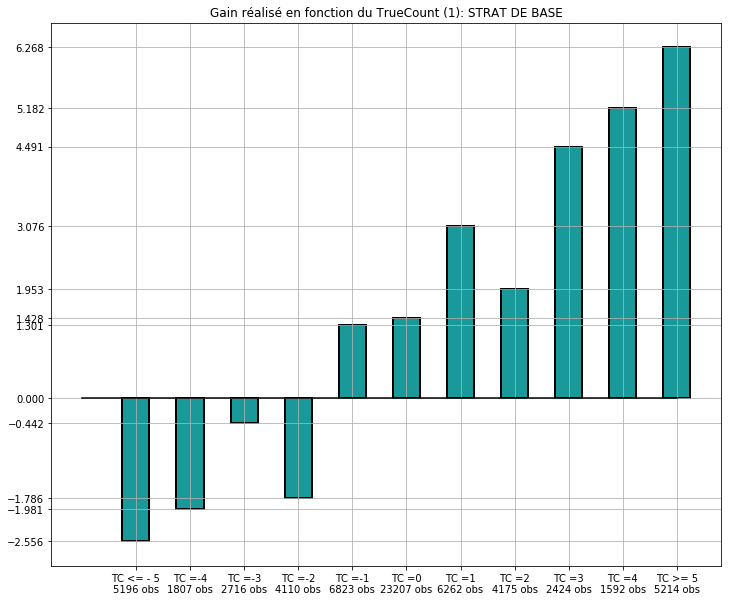

In [126]:
#PLOT ILLUSTRATION DE L'AVANTAGE DU JOUEUR AVEC LE TRUECOUNT (STRAT OPTIMALE)
taille = (12,10)
pylab.figure(figsize=taille)

x = [i for i in range(-5,6)]
plt.bar(x, gain_per_count,edgecolor=['black' for i in x], color='#199999',linewidth=['2' for i in x],width=0.5)
plt.title("Gain réalisé en fonction du TrueCount (1): STRAT DE BASE")
plt.xticks(x, ['TC '+i[1]+'\n'+str(i[0])+' obs' for i in Truecount_sample] )
plt.yticks([i for i in gain_per_count]+[0])
plt.grid(True)
plot([i for i in range(-6,6)],[0 for i in range(-6,6)], color='black')
show()




